<a href="https://colab.research.google.com/github/Shashwat17-vit/opencv/blob/master/TomatoCNNUnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#!pip install opencv-python
import sys
import os

if hasattr(sys, 'setdefaultencoding'):
    sys.setdefaultencoding('utf-8')

os.environ['PYTHONIOENCODING'] = 'utf-8'


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os
import numpy as np
import tensorflow.keras.backend as K
import tensorflow as tf

def dice_coefficient(y_true, y_pred, smooth=1):
    y_true = K.cast(y_true, 'float32')  # Ensure y_true is float32
    y_pred = K.cast(y_pred, 'float32')  # Ensure y_pred is float32

    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

In [31]:
#from google.colab import drive
#drive.mount('/content/drive')

In [41]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_images(image_dir, img_size=(1400, 875)):
    images = []

    image_files = sorted(os.listdir(image_dir))  # Ensure matching order with masks

    for img_file in image_files:
        # Load and preprocess the image
        img_path = os.path.join(image_dir, img_file)
        

        img = load_img(img_path, target_size=img_size)  # Resize image
        #img = img_to_array(img)
        #threshold = 150  # 255 is pure white; lower values for off-white backgrounds

        # Create a mask for white pixels
        #white_mask = (img[:, :, :3] >= threshold).all(axis=-1)

        # Change white pixels to black
        #img[white_mask] = [0, 0, 0]

                                                    
        #image_read = np.array(img) /255.0
    
        img = img_to_array(img) / 255.0  # Normalize image

        images.append(img)

    return np.array(images)

In [48]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_images(image_dir, img_size=(1400, 875)):
    images = []

    image_files = sorted(os.listdir(image_dir))  # Ensure matching order with masks

    for img_file in image_files:
        # Load and preprocess the image
        img_path = os.path.join(image_dir, img_file)

        img = load_img(img_path, target_size=img_size)  # Resize image

        img = img_to_array(img) / 255.0  # Normalize image

        images.append(img)

    return np.array(images)

In [49]:
from PIL import Image

file_path = "LeafDataset/LVD2021Extracted/LVD2021/9_VirginiaCreeper_labels/all/9_99/99_0003_背景.jpg"

try:
    img = Image.open(file_path)
    print("Image loaded successfully!")
    img_array = np.array(img) / 255.0
    print(img_array)
    print("Break")
except Exception as e:
    print(f"Error loading image: {e}")
import cv2
#image_read = cv2.imread("LeafDataset/LVD2021Extracted/LVD2021/9_VirginiaCreeper_labels/all/9_92/92_0003_背景.jpg", cv2.IMREAD_COLOR)
#print(image_read) LeafDataset\LVD2021Extracted\LVD2021\9_VirginiaCreeper_labels\all\9_92\92_0003_背景.jpg
image_read = cv2.imread("LeafDataset/LVD2021Extracted/LVD2021/9_VirginiaCreeper_labels/all/9_99/99_0003.jpg", cv2.IMREAD_COLOR)
#print(image_read) 

Image loaded successfully!
[[[0.83137255 0.83137255 0.82352941]
  [0.83137255 0.83137255 0.82352941]
  [0.83137255 0.83137255 0.82352941]
  ...
  [0.78431373 0.78823529 0.79607843]
  [0.78431373 0.78823529 0.79607843]
  [0.78431373 0.78823529 0.79607843]]

 [[0.83137255 0.83137255 0.82352941]
  [0.83137255 0.83137255 0.82352941]
  [0.83137255 0.83137255 0.82352941]
  ...
  [0.78431373 0.78823529 0.79607843]
  [0.78431373 0.78823529 0.79607843]
  [0.78431373 0.78823529 0.79607843]]

 [[0.83137255 0.83137255 0.82352941]
  [0.83137255 0.83137255 0.82352941]
  [0.83137255 0.83137255 0.82352941]
  ...
  [0.78431373 0.78823529 0.79607843]
  [0.78431373 0.78823529 0.79607843]
  [0.78431373 0.78823529 0.79607843]]

 ...

 [[0.85882353 0.8627451  0.87058824]
  [0.85882353 0.8627451  0.87058824]
  [0.85882353 0.8627451  0.87058824]
  ...
  [0.83529412 0.83921569 0.85490196]
  [0.83529412 0.83921569 0.85490196]
  [0.83529412 0.83921569 0.85490196]]

 [[0.85882353 0.8627451  0.87058824]
  [0.85882

In [34]:
image_path = "LeafDataset/LVD2021Extracted/LVD2021/3_Poplar_labels/train/3_1/1_0003_背景.jpg"
image = Image.open(image_path)

# Convert to a NumPy array for manipulation
image_np = np.array(image)

# Define the threshold for white (you may need to adjust this)
threshold = 150  # 255 is pure white; lower values for off-white backgrounds

# Create a mask for white pixels
white_mask = (image_np[:, :, :3] >= threshold).all(axis=-1)

# Change white pixels to black
image_np[white_mask] = [0, 0, 0]

# Convert back to Image
image_with_black_bg = Image.fromarray(image_np)

# Show or save the resulting image
image_with_black_bg.show()

mask_path = "LeafDataset/LVD2021Extracted/LVD2021/3_Poplar_labels/train/3_1/1_0000_图层 3.jpg"
mask = Image.open(mask_path)

# Convert to NumPy array for manipulation
mask_np = np.array(mask)

# Invert the mask: change 0 to 255 (black to white) and 255 to 0 (white to black)
inverted_mask_np = 255 - mask_np

# Convert back to Image
inverted_mask = Image.fromarray(inverted_mask_np)

# Show or save the resulting image
inverted_mask.show()
# inverted_mask.save("inverted_mask.jpg")



In [35]:
# Load the new external dataset 
from PIL import Image
import os
import cv2
import numpy as np

def load_dataset(root_dir, image_suffix="_背景.jpg", mask_suffix="_图层 3.jpg"):
    """
    Walk through the dataset directory and load image-mask pairs based on the hierarchy.
    
    Args:
        root_dir (str): Root directory containing the dataset.
        image_suffix (str): Suffix for image files.
        mask_suffix (str): Suffix for mask files.

    Returns:
        images (list): List of loaded images as NumPy arrays.
        masks (list): List of loaded masks as NumPy arrays.
        image_paths (list): List of file paths for images.
        mask_paths (list): List of file paths for masks.
    """
    images = []
    masks = []
    image_paths = []
    mask_paths = []
    count=250;

    # Iterate over top-level directories (1_Walnut_labels to 36_Holly_label)
    for label_dir in os.listdir(root_dir):
        label_path = os.path.normpath(os.path.join(root_dir, label_dir))
        print("root")
        # Check if it's a directory and matches the naming convention
        if os.path.isdir(label_path) and label_dir.endswith("_labels"):
            all_folder = os.path.normpath(os.path.join(label_path, "all"))
            print("all")
            # Check if the "all" folder exists
            if os.path.exists(all_folder):
                for subdir in os.listdir(all_folder):
                    #subdir_path = os.path.join(all_folder, subdir)
                    subdir_path = os.path.normpath(os.path.join(all_folder, subdir))
                    print(subdir_path)
                    #subdir_path=subdir_path.replace
                    # Ensure it's a directory (e.g., 1_1, 1_2, etc.)
                    if os.path.isdir(subdir_path):
                        # Collect images and masks from the subdirectory
                        
                        image_files = [f for f in os.listdir(subdir_path) if f.endswith(image_suffix)]
                        mask_files = [f for f in os.listdir(subdir_path) if f.endswith(mask_suffix)]
                        print(image_files)
                        print(mask_files)

                        for image_file in image_files:
                            for mask in mask_files:
                            #base_name = image_file.replace(image_suffix, "")
                            #mask_file = f"{base_name}{mask_suffix}"
                            #print(base_name)
                            #print(mask_file)
                            #image_path = os.path.normpath(os.path.join(subdir_path, image_file))
                            #mask_path = os.path.normpath(os.path.join(subdir_path, mask_file))
                                
                                """print(image_file)
                                image_path = os.path.normpath(os.path.join(subdir_path, image_file))
                                print(image_path)

                                print(mask)
                                mask_path = os.path.normpath(os.path.join(subdir_path, mask))
                                print(mask_path)

                                # Open image and mask using PIL
                                image_read = Image.open(image_path)
                                print(image_read)

                                mask_read = Image.open(mask_path)
                                print(mask_read)

                                # Resize images and masks to 1024x1024
                                image_read = image_read.resize((1024, 1024))
                                print(image_read)

                                omask_read = mask_read.resize((1024, 1024))
                                print(omask_read)
                                inverted_image_array=255-omask_read
                                mask_read = Image.fromarray(inverted_image_array)

                                # Convert the image to a numpy array and normalize to [0, 1]
                                image_read = np.array(image_read) / 255.0

                                # Convert mask to numpy array and normalize
                                mask_read = np.array(mask_read) / 255.0

                                #  Convert mask to grayscale by averaging along the last axis (RGB to grayscale)
                                mask_read = np.mean(mask_read, axis=-1)

                                # Expand dimensions to match shape (1024, 1024, 1)
                                mask_read = np.expand_dims(mask_read, axis=-1)

                                print(mask_read.shape)

                                # Append to images and masks list
                                images.append(image_read)
                                masks.append(mask_read)

                                # Decrease count and print
                                count -= 1
                                print(count)

                                # If count reaches 0, return the arrays
                                if count == 0:
                                    return np.array(images), np.array(masks), image_paths, mask_paths"""



                                
                                print(image_file)
                                image_path = os.path.normpath(os.path.join(subdir_path, image_file))
                                print(image_path)
                                
                                mask_path = os.path.normpath(os.path.join(subdir_path, mask))
                                print(mask_path)
                                #image_read = cv2.imread(image_path, cv2.IMREAD_COLOR)
                                image_read = Image.open(image_path)
                                mask_read = Image.open(mask_path)
                                # Optional: Resize images and masks to a consistent size (e.g., 256x256)
                                image_read =image_read.resize((1024,1024))
                                mask_read =mask_read.resize((1024,1024))
                                image_np = np.array(image_read)

                                # Define the threshold for white (you may need to adjust this)
                                threshold = 150  # 255 is pure white; lower values for off-white backgrounds

                                # Create a mask for white pixels
                                white_mask = (image_np[:, :, :3] >= threshold).all(axis=-1)

                                # Change white pixels to black
                                image_np[white_mask] = [0, 0, 0]

                                mask_np = np.array(mask_read)
                                

                                # Invert the mask: change 0 to 255 (black to white) and 255 to 0 (white to black)
                                inverted_mask_np = 255 - mask_np
                                
                                image_read = np.array(image_np) /255.0
                                mask_read = np.array(inverted_mask_np) / 255.0
                                
                                mask_read = (mask_read > 0).astype(np.float32)

                                #mask_read_print = mask_read[ :, :, 0]  # Remove the batch and channel dimensions
                                #np.savetxt('MaskValue.txt', mask_read)
                                
                                #print(mask_read.shape)
                                mask_read= np.mean(mask_read,axis=-1)
                                mask_read = np.expand_dims(mask_read, axis=-1)  
                                print(mask_read.shape)
                                # Append to lists
                                images.append(image_read)
                                masks.append(mask_read)
                                count-=1;
                                print(count)
                                if(count==0):
                                    return np.array(images), np.array(masks), image_paths, mask_paths


                                #image_paths.append(image_path)
                                #mask_paths.append(mask_path)

                            # Check if the corresponding mask exists
                            """if mask_file in mask_files:
                                # Load the image and mask
                                print(image_path)
                                print(mask_path)
                                image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                                mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
                                
                                # Optional: Resize images and masks to a consistent size (e.g., 256x256)
                                image = cv2.resize(image, (1024, 1024))
                                mask = cv2.resize(mask, (1024, 1024))
                                
                                # Append to lists
                                images.append(image)
                                masks.append(mask)
                                image_paths.append(image_path)
                                mask_paths.append(mask_path)"""

    return np.array(images), np.array(masks), image_paths, mask_paths

# Example usage
root_directory = "LeafDataset/LVD2021Extracted/LVD2021"
images_ex, masks_ex, image_paths, mask_paths = load_dataset(root_directory)

print(f"Loaded {len(images_ex)} image-mask pairs.")


root
all
LeafDataset\LVD2021Extracted\LVD2021\10_ForsythiaSuspensa_labels\all\10_1
['1_0004_背景.jpg']
['1_0001_图层 3.jpg']
1_0004_背景.jpg
LeafDataset\LVD2021Extracted\LVD2021\10_ForsythiaSuspensa_labels\all\10_1\1_0004_背景.jpg
LeafDataset\LVD2021Extracted\LVD2021\10_ForsythiaSuspensa_labels\all\10_1\1_0001_图层 3.jpg
(1024, 1024, 1)
249
LeafDataset\LVD2021Extracted\LVD2021\10_ForsythiaSuspensa_labels\all\10_10
['10_0004_背景.jpg']
['10_0001_图层 3.jpg']
10_0004_背景.jpg
LeafDataset\LVD2021Extracted\LVD2021\10_ForsythiaSuspensa_labels\all\10_10\10_0004_背景.jpg
LeafDataset\LVD2021Extracted\LVD2021\10_ForsythiaSuspensa_labels\all\10_10\10_0001_图层 3.jpg
(1024, 1024, 1)
248
LeafDataset\LVD2021Extracted\LVD2021\10_ForsythiaSuspensa_labels\all\10_100
['100_0004_背景.jpg']
['100_0001_图层 3.jpg']
100_0004_背景.jpg
LeafDataset\LVD2021Extracted\LVD2021\10_ForsythiaSuspensa_labels\all\10_100\100_0004_背景.jpg
LeafDataset\LVD2021Extracted\LVD2021\10_ForsythiaSuspensa_labels\all\10_100\100_0001_图层 3.jpg
(1024, 1024, 1)

KeyboardInterrupt: 

In [50]:
#image_dir = "drive/MyDrive/Data/infected-tomato-leaf-vein-segmentation/train"
image_dir = "infected-tomato-leaf-vein-segmentation/train"

img_size = (1024, 1024)  # Input size for U-Net

images_old = load_images(image_dir, img_size)

print(f"Loaded {len(images_old)} images")
print(f"Image shape: {images_old[0].shape}")
#print(f"Loaded {len(images_ex)} images")
#print(f"Image shape: {images_ex[0].shape}")

Loaded 17 images
Image shape: (1024, 1024, 3)


In [44]:
## Decoding the Run-Length Encoded Mask
import cv2
import numpy as np
HEIGHT = 1400
WIDTH = 875

#mask_read=pd.read_csv("drive/MyDrive/Data/infected-tomato-leaf-vein-segmentation/train.csv")
mask_read=pd.read_csv("infected-tomato-leaf-vein-segmentation/train.csv")


mask=mask_read['annotation']


def rl_decode(enc):
    parts = [int(s) for s in enc.split(' ')]
    dec = list()
    for i in range(0, len(parts), 2):
        cnt = parts[i]
        val = parts[i+1]
        dec += cnt * [val]
    return np.array(dec, dtype=np.uint8).reshape((HEIGHT, WIDTH))

decoded_masks=[]

for item in mask:
    np_mask=rl_decode(item)
    np_mask_resize=cv2.resize(np_mask,(1024,1024))
    np_mask_resize=np_mask_resize[:,:]
    decoded_masks.append(np_mask_resize)


decoded_masks = np.array(decoded_masks)
print(decoded_masks)

out=pd.DataFrame(decoded_masks[0])

#output=pd.DataFrame({'id':test_data.id,'Target':XGB_submit})
#output["Target"]=output['Target'].map({0:'Dropout',1:'Enrolled',2:'Graduate'})
out.to_csv('Check',index=False)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [52]:
# External Data View
if len(images_ex.shape) == 3:  # Shape (batch_size, height, width)
    thresholded_predictions = (images_ex> 0.5).astype(np.uint8)
    plt.imshow(images_ex[0], cmap='gray')
elif len(images_ex.shape) == 4:  # Shape (batch_size, height, width, channels)
    thresholded_predictions = (images_ex> 0.5).astype(np.uint8)
    plt.imshow(images_ex[0], cmap='gray')
    print((images_ex[0]))
else:
    raise ValueError("Unexpected shape of decoded_masks:", images_ex.shape)


NameError: name 'images_ex' is not defined

(17, 1024, 1024, 3)


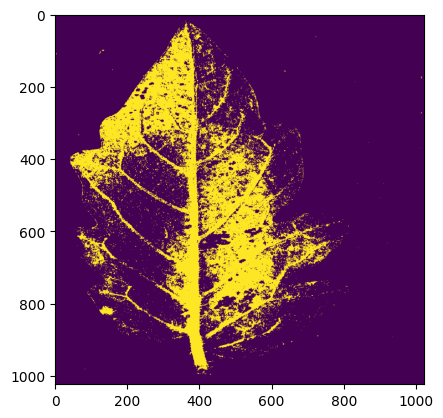

In [68]:

if len(images_old.shape) == 3:  # Shape (batch_size, height, width)
    thresholded_predictions = (images_old[16] > 0.5).astype(np.uint8)
    plt.imshow(thresholded_predictions, cmap='gray')
elif len(images_old.shape) == 4:  # Shape (batch_size, height, width, channels)
    thresholded_predictions = (images_old[16] > 0.5).astype(np.uint8)
    plt.imshow(thresholded_predictions[:, :, 0], cmap='gray')
    print(images_old.shape)
else:
    raise ValueError("Unexpected shape of decoded_masks:", decoded_masks.shape)

In [ ]:
#sub_temp = pd.DataFrame(masks_ex[0,:,:,0])
# Save the submission to a CSV file
#sub_temp.to_csv('maskc.csv', index=False)

#print("Submission file created successfully!")

if len(masks_ex.shape) == 3:  # Shape (batch_size, height, width)
    thresholded_predictions = (masks_ex[0] > 0.5).astype(np.uint8)
    plt.imshow(masks_ex[0])
elif len(masks_ex.shape) == 4:  # Shape (batch_size, height, width, channels)
    thresholded_predictions = (masks_ex[0] > 0.5).astype(np.uint8)
    plt.imshow(masks_ex[0][:, :, 0])
    print((masks_ex[0]))
    
else:
    raise ValueError("Unexpected shape of decoded_masks:", masks_ex.shape)


(17, 1024, 1024)


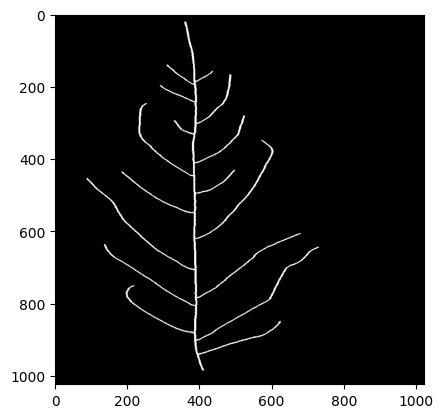

In [60]:
# Old DATA
if len(decoded_masks.shape) == 3:  # Shape (batch_size, height, width)
    thresholded_predictions = (decoded_masks[16] > 0.5).astype(np.uint8)
    print(decoded_masks.shape)
    plt.imshow(thresholded_predictions, cmap='gray')
elif len(decoded_masks.shape) == 4:  # Shape (batch_size, height, width, channels)
    thresholded_predictions = (decoded_masks[16] > 0.5).astype(np.uint8)
    plt.imshow(thresholded_predictions[:, :, 0], cmap='gray')
    print(decoded_masks.shape)
else:
    raise ValueError("Unexpected shape of decoded_masks:", masks_ex.shape)

In [12]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_val, y_train, y_val = train_test_split(images_ex,masks_ex, test_size=0.2, random_state=42)


# Fit U-Net
#model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=8)

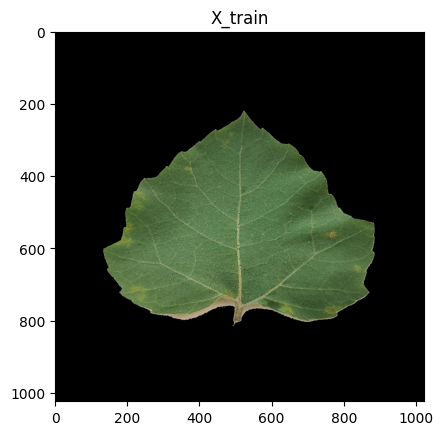

In [ ]:
plt.imshow(X_train[10])
plt.title("X_train")
plt.show()

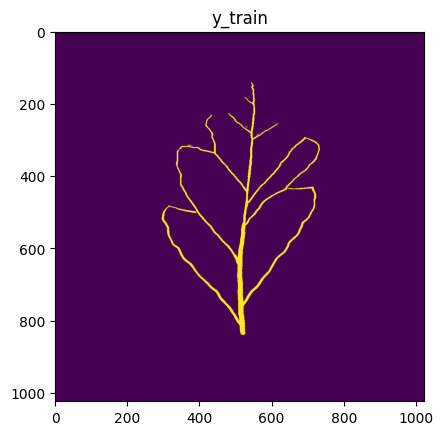

In [14]:

masks_ex1=(masks_ex> 0.2).astype(np.uint8)
plt.imshow(masks_ex1[10])
plt.title("y_train")
plt.show()

#masks_ex=(masks_ex> 0.5).astype(np.uint8)

In [15]:
## This model is not good
def unet_for_leaf(input_shape=(1024, 1024, 3)):
    # Sequential-like layers for U-Net
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=input_shape))

    # Encoder
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))

    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))

    model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))

    # Bottleneck
    model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'))

    # Decoder
    model.add(tf.keras.layers.UpSampling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))

    model.add(tf.keras.layers.UpSampling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))

    model.add(tf.keras.layers.UpSampling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))

    model.add(tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid'))

    return model

input_shape = (1024, 1024, 3)
unet_model = unet_for_leaf(input_shape)
unet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.BinaryIoU()])
unet_model.summary()

c:\Users\Shashwat\Desktop\US Applications\US\Internship\Machine Learning\Data Processing and Lib\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 1024, 1024, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 1024, 1024, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 512, 512, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 512, 512, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 512, 512, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 256, 256, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 256, 256, 256)  │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 256, 256, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 128, 128, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 512)  │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 128, 128, 512)  │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 256, 256, 512)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 256, 256, 256)  │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 256, 256, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 512, 512, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 512, 512, 128)  │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 512, 512, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 1024, 1024,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 1024, 1024, 64) │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 1024, 1024, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 1024, 1024, 1)  │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,008,769 (26.74 MB)

 Trainable params: 7,008,769 (26.74 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
# New implementation
from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Activation, UpSampling2D, BatchNormalization
from keras.optimizers import RMSprop
def get_unet_1024(input_shape=(1024, 1024, 3),
                  num_classes=1):
    inputs = Input(shape=input_shape)
    # 1024

    down0b = Conv2D(8, (3, 3), padding='same')(inputs)
    down0b = BatchNormalization()(down0b)
    down0b = Activation('relu')(down0b)
    down0b = Conv2D(8, (3, 3), padding='same')(down0b)
    down0b = BatchNormalization()(down0b)
    down0b = Activation('relu')(down0b)
    down0b_pool = MaxPooling2D((2, 2), strides=(2, 2))(down0b)
    # 512

    down0a = Conv2D(16, (3, 3), padding='same')(down0b_pool)
    down0a = BatchNormalization()(down0a)
    down0a = Activation('relu')(down0a)
    down0a = Conv2D(16, (3, 3), padding='same')(down0a)
    down0a = BatchNormalization()(down0a)
    down0a = Activation('relu')(down0a)
    down0a_pool = MaxPooling2D((2, 2), strides=(2, 2))(down0a)
    # 256

    down0 = Conv2D(32, (3, 3), padding='same')(down0a_pool)
    down0 = BatchNormalization()(down0)
    down0 = Activation('relu')(down0)
    down0 = Conv2D(32, (3, 3), padding='same')(down0)
    down0 = BatchNormalization()(down0)
    down0 = Activation('relu')(down0)
    down0_pool = MaxPooling2D((2, 2), strides=(2, 2))(down0)
    # 128

    down1 = Conv2D(64, (3, 3), padding='same')(down0_pool)
    down1 = BatchNormalization()(down1)
    down1 = Activation('relu')(down1)
    down1 = Conv2D(64, (3, 3), padding='same')(down1)
    down1 = BatchNormalization()(down1)
    down1 = Activation('relu')(down1)
    down1_pool = MaxPooling2D((2, 2), strides=(2, 2))(down1)
    # 64

    down2 = Conv2D(128, (3, 3), padding='same')(down1_pool)
    down2 = BatchNormalization()(down2)
    down2 = Activation('relu')(down2)
    down2 = Conv2D(128, (3, 3), padding='same')(down2)
    down2 = BatchNormalization()(down2)
    down2 = Activation('relu')(down2)
    down2_pool = MaxPooling2D((2, 2), strides=(2, 2))(down2)
    # 32

    down3 = Conv2D(256, (3, 3), padding='same')(down2_pool)
    down3 = BatchNormalization()(down3)
    down3 = Activation('relu')(down3)
    down3 = Conv2D(256, (3, 3), padding='same')(down3)
    down3 = BatchNormalization()(down3)
    down3 = Activation('relu')(down3)
    down3_pool = MaxPooling2D((2, 2), strides=(2, 2))(down3)
    # 16

    down4 = Conv2D(512, (3, 3), padding='same')(down3_pool)
    down4 = BatchNormalization()(down4)
    down4 = Activation('relu')(down4)
    down4 = Conv2D(512, (3, 3), padding='same')(down4)
    down4 = BatchNormalization()(down4)
    down4 = Activation('relu')(down4)
    down4_pool = MaxPooling2D((2, 2), strides=(2, 2))(down4)
    # 8

    center = Conv2D(1024, (3, 3), padding='same')(down4_pool)
    center = BatchNormalization()(center)
    center = Activation('relu')(center)
    center = Conv2D(1024, (3, 3), padding='same')(center)
    center = BatchNormalization()(center)
    center = Activation('relu')(center)
    # center

    up4 = UpSampling2D((2, 2))(center)
    up4 = concatenate([down4, up4], axis=3)
    up4 = Conv2D(512, (3, 3), padding='same')(up4)
    up4 = BatchNormalization()(up4)
    up4 = Activation('relu')(up4)
    up4 = Conv2D(512, (3, 3), padding='same')(up4)
    up4 = BatchNormalization()(up4)
    up4 = Activation('relu')(up4)
    up4 = Conv2D(512, (3, 3), padding='same')(up4)
    up4 = BatchNormalization()(up4)
    up4 = Activation('relu')(up4)
    # 16

    up3 = UpSampling2D((2, 2))(up4)
    up3 = concatenate([down3, up3], axis=3)
    up3 = Conv2D(256, (3, 3), padding='same')(up3)
    up3 = BatchNormalization()(up3)
    up3 = Activation('relu')(up3)
    up3 = Conv2D(256, (3, 3), padding='same')(up3)
    up3 = BatchNormalization()(up3)
    up3 = Activation('relu')(up3)
    up3 = Conv2D(256, (3, 3), padding='same')(up3)
    up3 = BatchNormalization()(up3)
    up3 = Activation('relu')(up3)
    # 32

    up2 = UpSampling2D((2, 2))(up3)
    up2 = concatenate([down2, up2], axis=3)
    up2 = Conv2D(128, (3, 3), padding='same')(up2)
    up2 = BatchNormalization()(up2)
    up2 = Activation('relu')(up2)
    up2 = Conv2D(128, (3, 3), padding='same')(up2)
    up2 = BatchNormalization()(up2)
    up2 = Activation('relu')(up2)
    up2 = Conv2D(128, (3, 3), padding='same')(up2)
    up2 = BatchNormalization()(up2)
    up2 = Activation('relu')(up2)
    # 64

    up1 = UpSampling2D((2, 2))(up2)
    up1 = concatenate([down1, up1], axis=3)
    up1 = Conv2D(64, (3, 3), padding='same')(up1)
    up1 = BatchNormalization()(up1)
    up1 = Activation('relu')(up1)
    up1 = Conv2D(64, (3, 3), padding='same')(up1)
    up1 = BatchNormalization()(up1)
    up1 = Activation('relu')(up1)
    up1 = Conv2D(64, (3, 3), padding='same')(up1)
    up1 = BatchNormalization()(up1)
    up1 = Activation('relu')(up1)
    # 128

    up0 = UpSampling2D((2, 2))(up1)
    up0 = concatenate([down0, up0], axis=3)
    up0 = Conv2D(32, (3, 3), padding='same')(up0)
    up0 = BatchNormalization()(up0)
    up0 = Activation('relu')(up0)
    up0 = Conv2D(32, (3, 3), padding='same')(up0)
    up0 = BatchNormalization()(up0)
    up0 = Activation('relu')(up0)
    up0 = Conv2D(32, (3, 3), padding='same')(up0)
    up0 = BatchNormalization()(up0)
    up0 = Activation('relu')(up0)
    # 256

    up0a = UpSampling2D((2, 2))(up0)
    up0a = concatenate([down0a, up0a], axis=3)
    up0a = Conv2D(16, (3, 3), padding='same')(up0a)
    up0a = BatchNormalization()(up0a)
    up0a = Activation('relu')(up0a)
    up0a = Conv2D(16, (3, 3), padding='same')(up0a)
    up0a = BatchNormalization()(up0a)
    up0a = Activation('relu')(up0a)
    up0a = Conv2D(16, (3, 3), padding='same')(up0a)
    up0a = BatchNormalization()(up0a)
    up0a = Activation('relu')(up0a)
    # 512

    up0b = UpSampling2D((2, 2))(up0a)
    up0b = concatenate([down0b, up0b], axis=3)
    up0b = Conv2D(8, (3, 3), padding='same')(up0b)
    up0b = BatchNormalization()(up0b)
    up0b = Activation('relu')(up0b)
    up0b = Conv2D(8, (3, 3), padding='same')(up0b)
    up0b = BatchNormalization()(up0b)
    up0b = Activation('relu')(up0b)
    up0b = Conv2D(8, (3, 3), padding='same')(up0b)
    up0b = BatchNormalization()(up0b)
    up0b = Activation('relu')(up0b)
    # 1024

    classify = Conv2D(num_classes, (1, 1), activation='sigmoid')(up0b)

    model = Model(inputs=inputs, outputs=classify)

    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=[tf.keras.metrics.BinaryIoU()])

    return model

input_shape = (1024, 1024, 3)
unet_model_new = get_unet_1024(input_shape)
unet_model_new.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.BinaryIoU()])
unet_model_new.summary()

Model: "functional_85"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 1024,      │          0 │ -                 │
│ (InputLayer)        │ 1024, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_38 (Conv2D)  │ (None, 1024,      │        224 │ input_layer_1[0]… │
│                     │ 1024, 8)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1024,      │         32 │ conv2d_38[0][0]   │
│ (BatchNormalizatio… │ 1024, 8)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_37       │ (None, 1024,      │          0 │ batch_normalizat… │
│ (Activation)        │ 1024, 8)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_39 (Conv2D)  │ (None, 1024,      │        584 │ activation_37[0]… │
│                     │ 1024, 8)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1024,      │         32 │ conv2d_39[0][0]   │
│ (BatchNormalizatio… │ 1024, 8)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_38       │ (None, 1024,      │          0 │ batch_normalizat… │
│ (Activation)        │ 1024, 8)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 512, 512,  │          0 │ activation_38[0]… │
│ (MaxPooling2D)      │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_40 (Conv2D)  │ (None, 512, 512,  │      1,168 │ max_pooling2d_7[… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512, 512,  │         64 │ conv2d_40[0][0]   │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_39       │ (None, 512, 512,  │          0 │ batch_normalizat… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_41 (Conv2D)  │ (None, 512, 512,  │      2,320 │ activation_39[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512, 512,  │         64 │ conv2d_41[0][0]   │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_40       │ (None, 512, 512,  │          0 │ batch_normalizat… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 256, 256,  │          0 │ activation_40[0]… │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_42 (Conv2D)  │ (None, 256, 256,  │      4,640 │ max_pooling2d_8[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        128 │ conv2d_42[0][0] 

 Total params: 34,637,337 (132.13 MB)

 Trainable params: 34,623,081 (132.08 MB)

 Non-trainable params: 14,256 (55.69 KB)

In [62]:
class StopAndTestCallback(tf.keras.callbacks.Callback):
    def __init__(self, stop_epoch):
        super().__init__()
        self.stop_epoch = stop_epoch

    def on_epoch_end(self, epoch, logs=None):
        if epoch + 1 == self.stop_epoch:
            print(f"\nStopping training at epoch {self.stop_epoch}")
            self.model.stop_training = True

In [18]:
#images=images[0]
#decoded_masks=decoded_masks[0]

### Train the model

In [65]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='model_checkpoint.weights.h5',  # Save path
    save_best_only=True,            # Save the model at every epoch
    save_weights_only=True           # Save weights instead of the full model
)
stop_epoch = 20

model_main= unet_model_new.fit(images_old, decoded_masks,epochs=25,batch_size=2, verbose=1,callbacks=[checkpoint_callback,StopAndTestCallback(stop_epoch)])

Epoch 1/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - binary_io_u_3: 0.4139 - loss: 0.4997
Epoch 2/25


c:\Users\Shashwat\Desktop\US Applications\US\Internship\Machine Learning\Data Processing and Lib\.venv\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:209: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - binary_io_u_3: 0.5015 - loss: 0.3837
Epoch 3/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - binary_io_u_3: 0.5206 - loss: 0.3179
Epoch 4/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - binary_io_u_3: 0.5112 - loss: 0.2710
Epoch 5/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 62s 7s/step - binary_io_u_3: 0.5029 - loss: 0.2477
Epoch 6/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 104s 11s/step - binary_io_u_3: 0.4978 - loss: 0.2357
Epoch 7/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 97s 12s/step - binary_io_u_3: 0.4980 - loss: 0.2240
Epoch 8/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 149s 12s/step - binary_io_u_3: 0.5132 - loss: 0.2201
Epoch 9/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 88s 10s/step - binary_io_u_3: 0.5179 - loss: 0.2105
Epoch 10/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 99s 12s/step - binary_io_u_3: 0.5150 - loss: 0.2029
Epoch 11/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 107s 13s/step - binary_io_u_3: 0.5114 - loss: 0.1953
Epoch 12/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 48s 5s/step - binary_io_u_3: 0.5008 - loss: 0.1865
Epoch 13/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 62s 7

In [26]:
from tensorflow.keras.models import load_model

old_model=load_model("unet_model_epoch2.h5")
old_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 1024, 1024, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 1024, 1024, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 512, 512, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 512, 512, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 512, 512, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 256, 256, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 256, 256, 256)  │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 256, 256, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 128, 128, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 512)  │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 128, 128, 512)  │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 256, 256, 512)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 256, 256, 256)  │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 256, 256, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 512, 512, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 512, 512, 128)  │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 512, 512, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 1024, 1024,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 1024, 1024, 64) │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 1024, 1024, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 1024, 1024, 1)  │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,008,771 (26.74 MB)

 Trainable params: 7,008,769 (26.74 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

(4, 1024, 1024, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
(1024, 1024, 1)


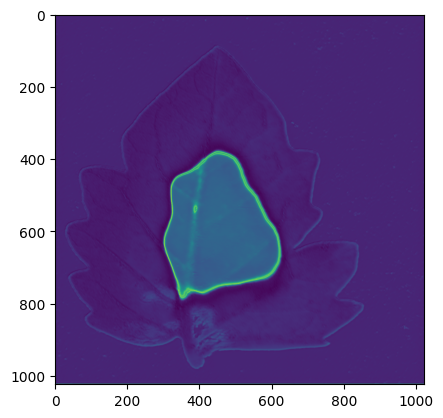

In [67]:
#image_dir = "drive/MyDrive/Data/infected-tomato-leaf-vein-segmentation/single"
image_dir = "infected-tomato-leaf-vein-segmentation/single"
#image_dir = "LeafDataset/LVD2021Extracted/LVD2021/1_Walnut_labels/test/1_10"
#image_dir = "LeafDataset/LVD2021Extracted/LVD2021/5_ChineseRedbud_labels/test/5_8"
#image_dir = "LeafDataset/LVD2021Extracted/LVD2021/14_Hibiscus_labels/test/14_2"


img_size = (1024, 1024)  # Input size for U-Net

images_test = load_images(image_dir, img_size)

print(images_test.shape)  # Should be (1, 1024, 1024, 3) for a single image

predictions = unet_model_new.predict(images_test)
#predictions = unet_model.predict(images_test)

print(predictions[0].shape)  # Should be (1, 875, 1400, 3) for a single image

reshaped_predictions = predictions[0][:, :, 0]  # Remove the batch and channel dimensions
np.savetxt('predictions.txt', reshaped_predictions)

thresholded_predictions = (predictions[0] > 0.5).astype(np.uint8)


import matplotlib.pyplot as plt

plt.imshow(predictions[0])  # For binary segmentation

#plt.imshow(thresholded_predictions[:, :, 0], cmap='gray')  # For binary segmentation
plt.show()


(4, 1024, 1024, 1)


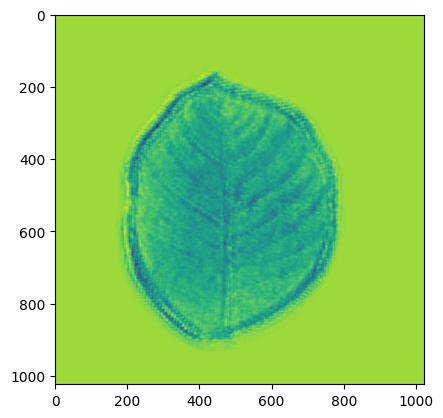

In [28]:
print(predictions.shape)
import matplotlib.pyplot as plt

plt.imshow(predictions[3])  # For binary segmentation

#sub_temp = pd.DataFrame(predictions[0][:,:,0])
# Save the submission to a CSV file
#sub_temp.to_csv('predictvalue.csv', index=False)
#print("Submission file created successfully!")



#plt.imshow(thresholded_predictions[:, :, 0], cmap='gray')  # For binary segmentation
plt.show()
reshaped_predictions = predictions[0, :, :, 0]  # Remove the batch and channel dimensions
np.savetxt('predictions.txt', reshaped_predictions)

In [29]:
# Save the entire model (architecture, weights, optimizer)
unet_model.save('unet_model_epoch20.h5')  # You can use any name for the file


In [ ]:
# Function to perform Run-Length Encoding
def run_length_encode(mask):
    # Flatten the 2D mask into a 1D array
    flat_mask = mask.flatten()

    # Initialize the result list to store the RLE encoding
    rle = []

    # Initialize the first character of the string and the count
    prev_char = flat_mask[0]
    count = 1

    # Iterate through the flattened mask starting from the second character
    for char in flat_mask[1:]:
        if char == prev_char:
            # If the character is the same as the previous one, increment the count
            count += 1
        else:
            # If the character changes, append the previous character's count and value to the result
            rle.append(count)
            rle.append(prev_char)
            # Reset the count for the new character
            prev_char = char
            count = 1

    # Append the last character's count and value
    rle.append(count)
    rle.append(prev_char)

    # Return the RLE encoded result as a space-separated string
    return ' '.join(map(str, rle))
# Function to preprocess the test image
def preprocess_image(img_path, target_size=(1024, 1024)):
    """Load and preprocess the image."""
    img = cv2.imread(img_path)
    img = cv2.resize(img, target_size)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = img / 255.0  # Normalize the image
    return img

# Path to the test folder containing images
test_folder = 'infected-tomato-leaf-vein-segmentation/test'

# Prepare the submission dataframe
submission_data = []

# Iterate through all images in the test folder
for image_name in os.listdir(test_folder):
    if image_name.endswith(('.jpg', '.png')):  # Only process image files
        img_path = os.path.join(test_folder, image_name)

        # Preprocess the image
        img = preprocess_image(img_path)

        # Predict the mask using the model
        #mask_prediction = unet_model.predict(img)
        mask_prediction = old_model.predict(img)
        mask = mask_prediction[0, :, :, 0]
        mask_resized = cv2.resize(mask, (875, 1400))
        # Since the output of the unet_model is a batch of masks, extract the first mask
        mask = (mask_resized> 0.5).astype(np.uint8)  # Binary mask, thresholding at 0.5
        reshaped_predictions = mask[:, :]  # Remove the batch and channel dimensions
        print(reshaped_predictions.shape)
        np.savetxt('predictions.txt', reshaped_predictions)

        # Apply RLE to the binary mask
        rle_encoded = run_length_encode(mask)

        # Append the result to the submission data
        image_id = image_name.split('.')[0]  # Extract the image ID without file extension
        submission_data.append([image_id, rle_encoded])

# Create a DataFrame for submission
submission_df = pd.DataFrame(submission_data, columns=['id', 'annotation'])

# Save the submission to a CSV file
submission_df.to_csv('submissionNew.csv', index=False)

print("Submission file created successfully!")